In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import os
import io
import pdb
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
import pyswarms as ps
from statistics import mean, stdev
from sklearn.model_selection import cross_val_score
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

C:\Users\ykond\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
#Machine learning models
vectorizer=CountVectorizer(stop_words='english',lowercase=True)
MNBC=MultinomialNB(alpha=0.5743650,class_prior=None,fit_prior=False)    #Multinomial Naive BAYES
SGDC=SGDClassifier(loss="hinge", alpha=0.0001, max_iter=1000, tol=1e-3, epsilon=0.1)   #Stochastic Gradient Descent
DTC=DecisionTreeClassifier(criterion = "entropy", splitter = "best")  #entropy can also be used  #Decision Tree
RFC=RandomForestClassifier(criterion = "entropy")  #entropy must be used after gini    #Random Forest
MLPC=MLPClassifier(hidden_layer_sizes=5,max_iter=10000,solver='lbfgs')  #Multi-layer Perceptron
ABC=AdaBoostClassifier(n_estimators=100)          #AdaBoost Classifier
GBC=GradientBoostingClassifier(n_estimators=100)        #GradientBoosting Classifier

##Bagging Technique
BMNBC=BaggingClassifier(MNBC)
BSGDC=BaggingClassifier(SGDC)
BDTC=BaggingClassifier(DTC)
BRFC=BaggingClassifier(RFC)
BMLPC=BaggingClassifier(MLPC)
BGBC=BaggingClassifier(GBC)
BABC=BaggingClassifier(ABC)


skf=StratifiedKFold(n_splits=4,shuffle=True)
models=[MNBC,SGDC,DTC,RFC,MLPC]
split_list=[5,4,3,2]

In [3]:
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path=os.path.join(root, filename)
            lines=[]
            f=io.open(path, 'r', encoding='latin1')
            for line in f:
                lines.append(line)
            f.close
            message='\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows=[]
    index=[]
    for filename, message in readFiles(path):
        rows.append({'message':message, 'class':classification})
        index.append(filename)
    return pd.DataFrame(rows, index=index)

data=pd.DataFrame({'message':[], 'class':[]})

data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Spam_Assassin_Dataset/Spam','Spam'))
data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Spam_Assassin_Dataset/Ham','Ham'))
X=data['message']
y=data['class']


'''Pre-processing'''
IDF = TfidfVectorizer().fit_transform(X)
Tr_tokens=vectorizer.fit_transform(X)



MNBC_accu_stratified=list()
SGDC_accu_stratified=list()
DTC_accu_stratified=list()
RFC_accu_stratified=list()
MPLC_accu_stratified=list()
scores=np.array

In [4]:
#Applying Stratified K_fold_Cross_Validation
def SKF_Split(x):
    skf=StratifiedKFold(n_splits=x,shuffle=True)
    #Stratified K_Fold_spliting
    for train_index, test_index in skf.split(Tr_tokens,y):
        global X_train, X_test, y_train, y_test
        X_train, X_test = Tr_tokens[train_index], Tr_tokens[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [5]:
#Bagging MNB
def BMNB_Classification():
    print("Bagging classification of Multinomial Naive BAYES's Training and testing is running")
    BMNBC.fit(X_train,y_train)
    pred=BMNBC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BMNBC.score(X_train,y_train)*100, BMNBC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [6]:
#Bagging GBC
def BGBC_Classification():
    print("Bagging classification of Gradientboost Classifier Training and testing is running")
    BGBC.fit(X_train, y_train)
    pred=BGBC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BGBC.score(X_train, y_train)*100, BGBC.score(X_test, y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [7]:
#Bagging AdaBoost Classification
def BABC_Classification():
    print("Bagging classification of Adaboost Classifier Training and testing is running")
    BABC.fit(X_train, y_train)
    pred=BABC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BABC.score(X_train, y_train)*100, BABC.score(X_test, y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [8]:
#Bagging Stochastic Gradient Descent (SGD) Calssification
def BSGDC_Classification():
    print("Bagging classification of Stochastic Gradient descent training and testing is running")
    BSGDC.fit(X_train,y_train)
    pred=BSGDC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BSGDC.score(X_train,y_train)*100, BSGDC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [9]:
#Bagging Decision Tree Classification
def BDTC_Classification():
    print("Bagging classification of Decision Tree Classifier Training and testing is running")
    BDTC.fit(X_train,y_train)
    pred=BDTC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BDTC.score(X_train,y_train)*100, BDTC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [10]:
#Random Forest Classification
def BRFC_Classification():
    print("Bagging classification of Random Forest Training and testing is running")
    BRFC.fit(X_train,y_train)
    pred=BRFC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BRFC.score(X_train,y_train)*100, BRFC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [11]:
#Multi-layer Perceptron Calssification
def BMLPC_Classification():
    print("Bagging classification of Multi-layer Perceptron Training and testing is running")
    BMLPC.fit(X_train,y_train)
    pred=BMLPC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = BMLPC.score(X_train,y_train)*100, BMLPC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

Stratified K-Fold has been applied for 5 Splits
Bagging classification of Multinomial Naive BAYES's Training and testing is running
Bagging classification of Stochastic Gradient descent training and testing is running
Bagging classification of Decision Tree Classifier Training and testing is running
Bagging classification of Random Forest Training and testing is running
Bagging classification of Multi-layer Perceptron Training and testing is running
Bagging classification of Gradientboost Classifier Training and testing is running
Bagging classification of Adaboost Classifier Training and testing is running
Stratified K-Fold has been applied for 4 Splits
Bagging classification of Multinomial Naive BAYES's Training and testing is running
Bagging classification of Stochastic Gradient descent training and testing is running
Bagging classification of Decision Tree Classifier Training and testing is running
Bagging classification of Random Forest Training and testing is running
Bagging clas

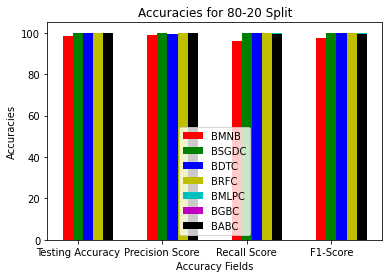

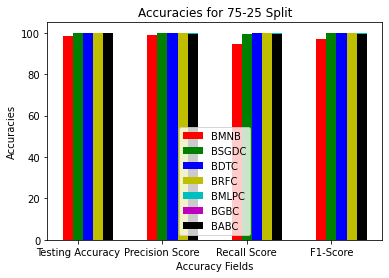

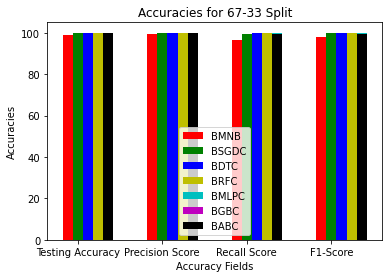

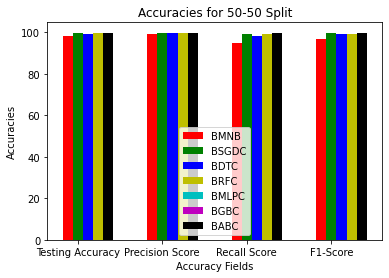

,Classifier,80-20 Split,Precision Score,Recall Score,F1-Score,75-25 Split,Precision Score,Recall Score,F1-Score,67-33 Split,Precision Score,Recall Score,F1-Score,50-50 Split,Precision Score,Recall Score,F1-Score
0,Stochastic Gradient Descent,99.860562,99.757869,99.757869,99.757869,99.814092,99.805825,99.548096,99.676794,99.818740,99.902771,99.467570,99.684696,99.656070,99.579016,99.225557,99.401972
1,Multinomial Naive BAYES,98.535905,99.000000,95.883777,97.416974,98.215282,99.054693,94.706262,96.831683,98.814835,99.549775,96.321394,97.908979,98.261759,99.122807,94.804776,96.915718
2,Random Forest,99.930281,99.838710,99.919290,99.878983,99.907046,99.935317,99.741769,99.838449,99.930284,100.000000,99.757986,99.878847,99.628184,99.772210,98.935140,99.351912
3,Decision Tree,99.883802,99.598071,100.000000,99.798631,99.962818,99.935442,99.935442,99.935442,99.986057,99.951621,100.000000,99.975805,99.377208,99.445532,98.386576,98.913220
4,Multi-later Perceptron,99.907042,99.678198,100.000000,99.838840,99.981409,100.000000,99.935442,99.967711,99.846626,99.709724,99.757986,99.733850,99.832683,99.709584,99.709584,99.709584
5,GradientBoosting Classifier,99.163374,99.506173,97.578692,98.533007,99.107641,98.892508,97.998709,98.443580,99.177356,99.070905,98.063892,98.564826,99.042573,98.890339,97.773475,98.328736
6,AdaBoost Classifier,99.697885,99.756494,99.192897,99.473897,99.646774,99.546632,99.225307,99.385710,99.762967,99.757164,99.419167,99.587879,99.749024,99.708738,99.419167,99.563742


In [12]:
def Main_Bagging():
    BMNB_ACC_LST=list()
    BSGDC_ACC_LST=list()
    BDTC_ACC_LST=list()
    BRFC_ACC_LST=list()
    BMLPC_ACC_LST=list()
    BGBC_ACC_LST=list()
    BABC_ACC_LST=list()
    
    for ele in split_list:
        print("Stratified K-Fold has been applied for {} Splits".format(ele))
        SKF_Split(ele)
        acc1=BMNB_Classification()
        acc2=BSGDC_Classification()
        acc3=BDTC_Classification()
        acc4=BRFC_Classification()
        acc5=BMLPC_Classification()
        acc6=BGBC_Classification()
        acc7=BABC_Classification()
        BMNB_ACC_LST.append(acc1*100)
        BSGDC_ACC_LST.append(acc2*100)
        BDTC_ACC_LST.append(acc3*100)
        BRFC_ACC_LST.append(acc4*100)
        BMLPC_ACC_LST.append(acc5*100)
        BGBC_ACC_LST.append(acc6*100)
        BABC_ACC_LST.append(acc7*100)
        
    Accuracy_Table=[('Stochastic Gradient Descent',BSGDC_ACC_LST[0][0],BSGDC_ACC_LST[0][1],BSGDC_ACC_LST[0][2],BSGDC_ACC_LST[0][3],BSGDC_ACC_LST[1][0],BSGDC_ACC_LST[1][1],BSGDC_ACC_LST[1][2],BSGDC_ACC_LST[1][3],BSGDC_ACC_LST[2][0],BSGDC_ACC_LST[2][1],BSGDC_ACC_LST[2][2],BSGDC_ACC_LST[2][3],BSGDC_ACC_LST[3][0],BSGDC_ACC_LST[3][1],BSGDC_ACC_LST[3][2],BSGDC_ACC_LST[3][3]),
                ('Multinomial Naive BAYES',BMNB_ACC_LST[0][0],BMNB_ACC_LST[0][1],BMNB_ACC_LST[0][2],BMNB_ACC_LST[0][3],BMNB_ACC_LST[1][0],BMNB_ACC_LST[1][1],BMNB_ACC_LST[1][2],BMNB_ACC_LST[1][3],BMNB_ACC_LST[2][0],BMNB_ACC_LST[2][1],BMNB_ACC_LST[2][2],BMNB_ACC_LST[2][3],BMNB_ACC_LST[3][0],BMNB_ACC_LST[3][1],BMNB_ACC_LST[3][2],BMNB_ACC_LST[3][3]),
                ('Random Forest',BRFC_ACC_LST[0][0],BRFC_ACC_LST[0][1],BRFC_ACC_LST[0][2],BRFC_ACC_LST[0][3],BRFC_ACC_LST[1][0],BRFC_ACC_LST[1][1],BRFC_ACC_LST[1][2],BRFC_ACC_LST[1][3],BRFC_ACC_LST[2][0],BRFC_ACC_LST[2][1],BRFC_ACC_LST[2][2],BRFC_ACC_LST[2][3],BRFC_ACC_LST[3][0],BRFC_ACC_LST[3][1],BRFC_ACC_LST[3][2],BRFC_ACC_LST[3][3]),
                ('Decision Tree',BDTC_ACC_LST[0][0],BDTC_ACC_LST[0][1],BDTC_ACC_LST[0][2],BDTC_ACC_LST[0][3],BDTC_ACC_LST[1][0],BDTC_ACC_LST[1][1],BDTC_ACC_LST[1][2],BDTC_ACC_LST[1][3],BDTC_ACC_LST[2][0],BDTC_ACC_LST[2][1],BDTC_ACC_LST[2][2],BDTC_ACC_LST[2][3],BDTC_ACC_LST[3][0],BDTC_ACC_LST[3][1],BDTC_ACC_LST[3][2],BDTC_ACC_LST[3][3]),
                ('Multi-later Perceptron',BMLPC_ACC_LST[0][0],BMLPC_ACC_LST[0][1],BMLPC_ACC_LST[0][2],BMLPC_ACC_LST[0][3],BMLPC_ACC_LST[1][0],BMLPC_ACC_LST[1][1],BMLPC_ACC_LST[1][2],BMLPC_ACC_LST[1][3],BMLPC_ACC_LST[2][0],BMLPC_ACC_LST[2][1],BMLPC_ACC_LST[2][2],BMLPC_ACC_LST[2][3],BMLPC_ACC_LST[3][0],BMLPC_ACC_LST[3][1],BMLPC_ACC_LST[3][2],BMLPC_ACC_LST[3][3]),
                ('GradientBoosting Classifier',BGBC_ACC_LST[0][0],BGBC_ACC_LST[0][1],BGBC_ACC_LST[0][2],BGBC_ACC_LST[0][3],BGBC_ACC_LST[1][0],BGBC_ACC_LST[1][1],BGBC_ACC_LST[1][2],BGBC_ACC_LST[1][3],BGBC_ACC_LST[2][0],BGBC_ACC_LST[2][1],BGBC_ACC_LST[2][2],BGBC_ACC_LST[2][3],BGBC_ACC_LST[3][0],BGBC_ACC_LST[3][1],BGBC_ACC_LST[3][2],BGBC_ACC_LST[3][3]),
                ('AdaBoost Classifier',BABC_ACC_LST[0][0],BABC_ACC_LST[0][1],BABC_ACC_LST[0][2],BABC_ACC_LST[0][3],BABC_ACC_LST[1][0],BABC_ACC_LST[1][1],BABC_ACC_LST[1][2],BABC_ACC_LST[1][3],BABC_ACC_LST[2][0],BABC_ACC_LST[2][1],BABC_ACC_LST[2][2],BABC_ACC_LST[2][3],BABC_ACC_LST[3][0],BABC_ACC_LST[3][1],BABC_ACC_LST[3][2],BABC_ACC_LST[3][3])
               ]
    Result_table=pd.DataFrame(Accuracy_Table,columns=["Classifier","80-20 Split","Precision Score","Recall Score","F1-Score","75-25 Split","Precision Score","Recall Score","F1-Score","67-33 Split","Precision Score","Recall Score","F1-Score","50-50 Split","Precision Score","Recall Score","F1-Score"])
    
    '''80-20 Split Accuracy Plot '''
    N = 4
    ind = np.arange(N) 
    width = 0.08

    BMNB_vals = [BMNB_ACC_LST[0][0],BMNB_ACC_LST[0][1],BMNB_ACC_LST[0][2],BMNB_ACC_LST[0][3]]
    bar1 = plt.bar(ind, BMNB_vals, width, color = 'r')

    BSGDC_vals = [BSGDC_ACC_LST[0][0],BSGDC_ACC_LST[0][1],BSGDC_ACC_LST[0][2],BSGDC_ACC_LST[0][3]]
    bar2 = plt.bar(ind+width, BSGDC_vals, width, color='g')

    BDTC_vals = [BDTC_ACC_LST[0][0],BDTC_ACC_LST[0][1],BDTC_ACC_LST[0][2],BDTC_ACC_LST[0][3]]
    bar3 = plt.bar(ind+width*2, BDTC_vals, width, color = 'b')

    BRFC_vals = [BRFC_ACC_LST[0][0],BRFC_ACC_LST[0][1],BRFC_ACC_LST[0][2],BRFC_ACC_LST[0][3]]
    bar4 = plt.bar(ind+width*3, BRFC_vals, width, color='y')
    
    BMLPC_vals = [BMLPC_ACC_LST[0][0],BMLPC_ACC_LST[0][1],BMLPC_ACC_LST[0][2],BMLPC_ACC_LST[0][3]]
    bar5 = plt.bar(ind+width*4, BMLPC_vals, width, color='c')
    
    BGBC_vals = [BGBC_ACC_LST[0][0],BGBC_ACC_LST[0][1],BGBC_ACC_LST[0][2],BGBC_ACC_LST[0][3]]
    bar6 = plt.bar(ind+width*5, BGBC_vals, width, color='m')
    
    BABC_vals = [BABC_ACC_LST[0][0],BABC_ACC_LST[0][1],BABC_ACC_LST[0][2],BABC_ACC_LST[0][3]]
    bar7 = plt.bar(ind+width*6, BABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 80-20 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('BMNB', 'BSGDC', 'BDTC', 'BRFC', 'BMLPC', 'BGBC', 'BABC') )
    plt.show()
    
    '''75-25 Split Accuracy Plot '''

    BMNB_vals = [BMNB_ACC_LST[1][0],BMNB_ACC_LST[1][1],BMNB_ACC_LST[1][2],BMNB_ACC_LST[1][3]]
    bar1 = plt.bar(ind, BMNB_vals, width, color = 'r')

    BSGDC_vals = [BSGDC_ACC_LST[1][0],BSGDC_ACC_LST[1][1],BSGDC_ACC_LST[1][2],BSGDC_ACC_LST[1][3]]
    bar2 = plt.bar(ind+width, BSGDC_vals, width, color='g')

    BDTC_vals = [BDTC_ACC_LST[1][0],BDTC_ACC_LST[1][1],BDTC_ACC_LST[1][2],BDTC_ACC_LST[1][3]]
    bar3 = plt.bar(ind+width*2, BDTC_vals, width, color = 'b')

    BRFC_vals = [BRFC_ACC_LST[1][0],BRFC_ACC_LST[1][1],BRFC_ACC_LST[1][2],BRFC_ACC_LST[1][3]]
    bar4 = plt.bar(ind+width*3, BRFC_vals, width, color='y')
    
    BMLPC_vals = [BMLPC_ACC_LST[1][0],BMLPC_ACC_LST[1][1],BMLPC_ACC_LST[1][2],BMLPC_ACC_LST[1][3]]
    bar5 = plt.bar(ind+width*4, BMLPC_vals, width, color='c')
    
    BGBC_vals = [BGBC_ACC_LST[1][0],BGBC_ACC_LST[1][1],BGBC_ACC_LST[1][2],BGBC_ACC_LST[1][3]]
    bar6 = plt.bar(ind+width*5, BGBC_vals, width, color='m')
    
    BABC_vals = [BABC_ACC_LST[1][0],BABC_ACC_LST[1][1],BABC_ACC_LST[1][2],BABC_ACC_LST[1][3]]
    bar7 = plt.bar(ind+width*6, BABC_vals, width, color='k')
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 75-25 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('BMNB', 'BSGDC', 'BDTC', 'BRFC', 'BMLPC', 'BGBC', 'BABC') )
    plt.show()
    
    
    '''67-33 Split Accuracy Plot '''

    BMNB_vals = [BMNB_ACC_LST[2][0],BMNB_ACC_LST[2][1],BMNB_ACC_LST[2][2],BMNB_ACC_LST[2][3]]
    bar1 = plt.bar(ind, BMNB_vals, width, color = 'r')

    BSGDC_vals = [BSGDC_ACC_LST[2][0],BSGDC_ACC_LST[2][1],BSGDC_ACC_LST[2][2],BSGDC_ACC_LST[2][3]]
    bar2 = plt.bar(ind+width, BSGDC_vals, width, color='g')

    BDTC_vals = [BDTC_ACC_LST[2][0],BDTC_ACC_LST[2][1],BDTC_ACC_LST[2][2],BDTC_ACC_LST[2][3]]
    bar3 = plt.bar(ind+width*2, BDTC_vals, width, color = 'b')

    BRFC_vals = [BRFC_ACC_LST[2][0],BRFC_ACC_LST[2][1],BRFC_ACC_LST[2][2],BRFC_ACC_LST[2][3]]
    bar4 = plt.bar(ind+width*3, BRFC_vals, width, color='y')
    
    BMLPC_vals = [BMLPC_ACC_LST[2][1],BMLPC_ACC_LST[2][1],BMLPC_ACC_LST[2][2],BMLPC_ACC_LST[2][3]]
    bar5 = plt.bar(ind+width*4, BMLPC_vals, width, color='c')
    
    BGBC_vals = [BGBC_ACC_LST[2][0],BGBC_ACC_LST[2][1],BGBC_ACC_LST[2][2],BGBC_ACC_LST[2][3]]
    bar6 = plt.bar(ind+width*5, BGBC_vals, width, color='m')
    
    BABC_vals = [BABC_ACC_LST[2][0],BABC_ACC_LST[2][1],BABC_ACC_LST[2][2],BABC_ACC_LST[2][3]]
    bar7 = plt.bar(ind+width*6, BABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 67-33 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('BMNB', 'BSGDC', 'BDTC', 'BRFC', 'BMLPC', 'BGBC', 'BABC') )
    plt.show()
    
    
    
    '''50-50 Split Accuracy Plot '''

    BMNB_vals = [BMNB_ACC_LST[3][0],BMNB_ACC_LST[3][1],BMNB_ACC_LST[3][2],BMNB_ACC_LST[3][3]]
    bar1 = plt.bar(ind, BMNB_vals, width, color = 'r')

    BSGDC_vals = [BSGDC_ACC_LST[3][0],BSGDC_ACC_LST[3][1],BSGDC_ACC_LST[3][2],BSGDC_ACC_LST[3][3]]
    bar2 = plt.bar(ind+width, BSGDC_vals, width, color='g')

    BDTC_vals = [BDTC_ACC_LST[3][0],BDTC_ACC_LST[3][1],BDTC_ACC_LST[3][2],BDTC_ACC_LST[3][3]]
    bar3 = plt.bar(ind+width*2, BDTC_vals, width, color = 'b')

    BRFC_vals = [BRFC_ACC_LST[3][0],BRFC_ACC_LST[3][1],BRFC_ACC_LST[3][2],BRFC_ACC_LST[3][3]]
    bar4 = plt.bar(ind+width*3, BRFC_vals, width, color='y')
    
    BMLPC_vals = [BMLPC_ACC_LST[3][1],BMLPC_ACC_LST[3][1],BMLPC_ACC_LST[3][2],BMLPC_ACC_LST[3][3]]
    bar5 = plt.bar(ind+width*4, BMLPC_vals, width, color='c')
    
    BGBC_vals = [BGBC_ACC_LST[3][0],BGBC_ACC_LST[3][1],BGBC_ACC_LST[3][2],BGBC_ACC_LST[3][3]]
    bar6 = plt.bar(ind+width*5, BGBC_vals, width, color='m')
    
    BABC_vals = [BABC_ACC_LST[3][0],BABC_ACC_LST[3][1],BABC_ACC_LST[3][2],BABC_ACC_LST[3][3]]
    bar7 = plt.bar(ind+width*6, BABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 50-50 Split")

    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('BMNB', 'BSGDC', 'BDTC', 'BRFC', 'BMLPC', 'BGBC', 'BABC') )
    plt.show()
    
    
    
    return Result_table
Main_Bagging()